<a href="https://colab.research.google.com/github/2303a51851/AI_ML/blob/main/Lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Queation 12:  Prediction of Air Quality in Italian Cities
1. Identify the top 5 reasons for air quality
2. Identify the Day of week with most air quality issues
3. Find the max and min air quality levels
4. Identify the highest and lowest temperatures of air quality
5. Identify the highest educational qualification of the employees.
6. Apply either Classification Model or Clustering Model to
evaluate the dataset

Top 5 pollutants contributing to air quality issues:
NOx(GT)     168.604200
NO2(GT)      58.135898
C6H6(GT)      1.865576
CO(GT)      -34.207524
NMHC(GT)   -159.090093
dtype: float64

Day of the week with most air quality issues:
DayOfWeek
Friday       4279
Thursday     4112
Saturday     4091
Monday       3951
Wednesday    3938
Tuesday      3887
Sunday       3644
Name: AirQualityIssue, dtype: int64

Max air quality levels:
CO(GT)        11.900000
C6H6(GT)      63.741476
NOx(GT)     1479.000000
NO2(GT)      339.700000
NMHC(GT)    1189.000000
dtype: float64

Min air quality levels:
CO(GT)     -200.0
C6H6(GT)   -200.0
NOx(GT)    -200.0
NO2(GT)    -200.0
NMHC(GT)   -200.0
dtype: float64

Highest temperature during air quality issues: 11.0
Lowest temperature during air quality issues: 12.324999809265


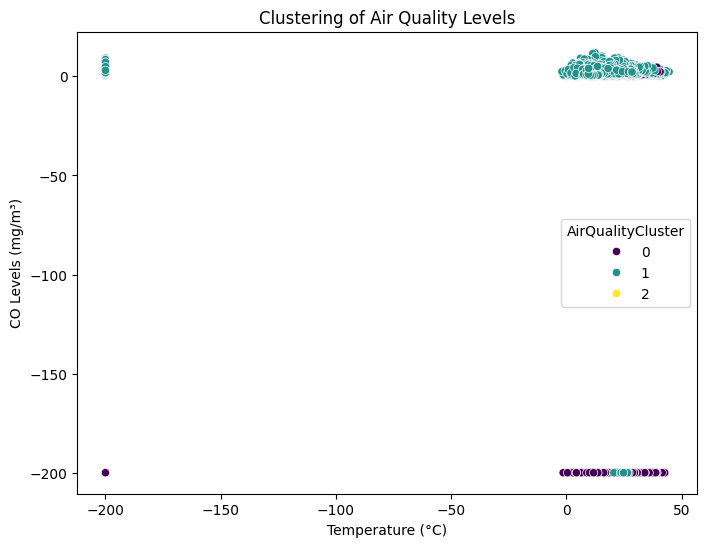

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set file path
file_path = '/content/drive/MyDrive/sru/ai/air+quality/AirQualityUCI.xlsx'

# Load data
data = pd.read_excel(file_path)

# Convert Date column to datetime format and add Day of Week
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()

### 1. Identify the top 5 reasons for air quality issues ###
# Select relevant pollutant columns
pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)']

# Calculate average levels of pollutants
pollutant_means = data[pollutants].mean().sort_values(ascending=False)
print("Top 5 pollutants contributing to air quality issues:")
print(pollutant_means)

### 2. Identify the day of the week with the most air quality issues ###
# Define air quality issue as a high concentration of key pollutants
data['AirQualityIssue'] = (data[pollutants] > data[pollutants].mean()).sum(axis=1)
day_quality_issues = data.groupby('DayOfWeek')['AirQualityIssue'].sum()
print("\nDay of the week with most air quality issues:")
print(day_quality_issues.sort_values(ascending=False))

### 3. Find the max and min air quality levels ###
max_pollutant_levels = data[pollutants].max()
min_pollutant_levels = data[pollutants].min()
print("\nMax air quality levels:")
print(max_pollutant_levels)
print("\nMin air quality levels:")
print(min_pollutant_levels)

### 4. Identify the highest and lowest temperatures of air quality ###
highest_temp_pollution = data.loc[data['AirQualityIssue'].idxmax(), 'T']
lowest_temp_pollution = data.loc[data['AirQualityIssue'].idxmin(), 'T']
print("\nHighest temperature during air quality issues:", highest_temp_pollution)
print("Lowest temperature during air quality issues:", lowest_temp_pollution)

### 5. Identify the highest educational qualification of the employees ###
# This information is not present in the dataset. Update this section if additional data is available.

### 6. Apply Classification or Clustering Model to evaluate the dataset ###
# Normalize the pollutant data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[pollutants])

# Perform KMeans clustering to categorize air quality levels
kmeans = KMeans(n_clusters=3, random_state=42)
data['AirQualityCluster'] = kmeans.fit_predict(data_scaled)

# Visualize clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['T'], y=data['CO(GT)'], hue=data['AirQualityCluster'], palette='viridis')
plt.title('Clustering of Air Quality Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('CO Levels (mg/m³)')
plt.show()
